# Machine Error

## Introduction 

People expect computers to be entirely accurate and precise with numbers although that is not always the case. 
If you type $0.4+0.3$ you expect $0.7$ as the answer. The computer may give you $.700000001$ instead. This is what is called a floating number. Floating numbers are in scientific notation. Normally we write scientific notation to the base 10, but binary scientific notation uses the base 2 instead. The reason why binary numbers use base 2 is because they only have a choice of either 1 or 2, while normal numbers use base 10 because they have a choise of 10 numbers ($0,1,2,3,4,5,6,7,8,9$) 

|Base                                                                         |        
|:----------------------------------------------------------------------------|
|10  ||$1000$|$100$|$10$|$1$|.|$\frac{1}{10}$|$\frac{1}{100}$|$\frac{1}{1000}$|   
|2   ||$8$   |$4$  |$2$ |$1$|.|$\frac{1}{2}$ |$\frac{1}{4}$  |$\frac{1}{8}$   |


IEE (Instite of Electrical and Electronic Engineers) is the world's largest technical organization. Most computers are built on the IEEE754 standard. The following form is called a normalized floating point number.

[$\pm]1.[Mantissa]\times[2^{Exponent}$] = [sign]1.[Decimal portion]$\times$[Exponent]

Different types of computers use different sizes of bits for precision. Python uses the Double format

|Precision       | Sign    | Exponent   | Mantissa   |Total (bit)
|:---------------|:--------|:-----------|:-----------|:-------------|
|Single          | 1       |8           |23          |32            |
|*Double         | 1       |11          |52          |64            |
|Long Double     | 1       |15          |64          |80            |

We use rounding in everyday use, for example: The speed of light is known to be $3\times10^8$. That number is actually $2.997\times10^8$ but we round it to ease everyday calculations as the difference between the two numbers is insignificant. 

Rounding using floating numbers is not quite as simple for computers since they need to deal with massive numbers and extremely tiny numbers. Python uses 64 bits, therefore it can store 52 siginificant digits in it's mantissa and that would cause it to lose precision  since it can't store anymore numbers beyond the 52 digits. It specifically loses precision when dealing with reoccuring numbers since it does not understand the concept of recursion like humans do. 

For example, when calculating using base 10: $\frac{1}{3}=0.333...$(infinite number of 3's). $\frac{1}{3}+\frac{1}{3}+\frac{1}{3}=1$

Although when using base 2: $\frac{1}{3}=0.333...$(only goes up to 52 3's). So a computer would calculate $\frac{1}{3}+\frac{1}{3}+\frac{1}{3}=0.999...$(up to 52 9's)

Therefore the computer may think that $\frac{1}{3}+\frac{1}{3}+\frac{1}{3}\neq1$

This may not seem as a big issue, but we depened on computers to preform calculations to the highest degree of accuracy for sensative operations such as dealing with curreny. It is also necessary to understand situations when naively coding mathematical functions or expressions can lead to errors of unacceptable magnitudes. That is why we need to understand the reasoning behind this rounding error and to find effective ways to minizime the error in order to get the most accurate answers possible.

*source 1,3

## Part 1 

In order to understand how the computer carries out floating number rounding, you must first understand how the exponent and the mantissa come into play in forming a normalized number. 

[$\pm]1.[Mantissa]\times[2^{Exponent}]$

The first box represents the sign of the number. If the number is positive then the sign is 0 and if the number is negative then the sign is 1. The second box is the mantissa which is the part of the number that comes after the decimal point and it is stored in binary. It is multiplied by $2$ raised to the power of the exponent. 

For example: the normal base 10 number $(23.171875)_{10}$ converted to a  base 2 number is $(10111.001011)_{2}$ in binary. 

Where $(10111.001011)_{2}= +1.0111001011\times2^4$ (IEEE normalized floating point number)

+ Since the number is positive, it starts with a + sign which translates to sign [0]
+ The leading 1. is not stored since it is built in the mantissa 
+ The mantissa is all the 52 numbers following the decimal point [0111001011000000000000000000000000000000000000000]
+ The exponent is 4 because we moved 4 digits to the left in order to get the number in scientific notation
+ We multiply the mantissa by $2^{4}$ in order to get it in the correct scientific notation form

Let's talk more about the exponent; In a 64 bit computer the exponent can store up to 11 bits. Since binary only stores 2 numbers (1's and 0's) and the length of the exponent is 11, then the computer can store up to $2^{11}=2048$ different digits in the exponents section. We are going to keep two integers for special cases which I will discuss in a minute. With these remaining 2046 integrs we need to make sure that we include both poistive and negative exponents. We can do this by subtracting by the biase exponent; the biase exponent is equal to half the number of integers we can store $\frac{2046}{2}=1023$ . The biased exponent consists of all positive integers between 0 and 2048, therefore by subtracting 1023 we can get an unbiased exponent that included all positive and negative exponents between -1022 till 1023 as the 2045 numbers, and 0 as the 2046th. When going from unbaised exponent to the biased exponent you add the baise (1023) and vice versa. 

Example: If your exponent is $2^4$ then you would add your bias $4+1023=1027$ which would be represented as $(10000000011)_2$. Notice that the exponent is made up of 11 bits which represent the integer 1027 in binary form.
Since the expononet is base 2, each box corresponds to $2^{n}$, where n is the number of the box starting from 0. The first 1, from the right, that we have in the exponont corresponds to $2^0$ and the second 1 corresponds to $2^1$ and the last 1 corresponds to $2^{11}=1024$ since it is in the 11th box. Finally you add all your exponents $1+2+1024=1027$ to make sure that the exponent in binary for matches the representative integer.

Now that we know that the exponent can store numbers between the range -1022 till 1023, we start to wonder on how the computer can store numbers larger than that range. This is where the two special integers come into play, we allocate the exponents 1024 and -1023 to represent $\infty$ and subnormal numbers (very small numbers) respectively. Exponent 1024 takes care of all of the overflow numbers both in the positive and negative direction. An overflow occurs when an arithmetic operation attempts to create a numeric value that is outside of the range – either larger than the maximum or lower than the minimum representable value. While Exponent -1023 takes care of all of the underflow numbers which classify as subnormal numbers. An underflow occurs when the value of a floating point number is smaller in magnitude (that is, closer to zero) than the smallest representable value as a normal floating point number. If all bits of the exponent field are set to 1 and all bits of the mantissa are 0, then the floating-point number is infinity. If all bits of the exponent field are set to 1 and all bits of the mantissa are not equal to 0, then the floating point number is NaN (Not a number). The mantissa is stored without the leading 1 only for subnormal numbers and zero. Thus if the exponent is non-minimal, there is an implicit leading 1, and if the exponent is minimal, there isn't, and the number is either subnormal or zero. If all bits of the exponent field are set to 0 and all bits of the mantissa are 0 as well, then the number is subnormal. If all bits of the exponent field are set to 0, and all bits of the mantissa are 0 then the number is zero. A special case is made for the number zero where the exponent is taken to be $1- bias$. Such a number is called a denormalized number and is represented below 

$[\pm](0.Mantissa) \times 2^{1-bias}$ 

Examples:

|Sign (1 bit) | Exponent (11 bit)      | Mantissa (52 bit) |           |
|:------------|:-----------------------|:------------------|:----------|
|$0$          |11111111111             |000000000...       |=$\infty$  |
|$0$          |11111111111             |011010110...       |=NaN       |
|$0$          |00000000000             |101011000...       |=Subnormal |
|$0$          |00000000000             |000000000...       |=0         |

Since we have learned that not every number can be represented precisely by the machine and that are there bounds on the range of values stored by the machine, we will now talk about how there is a finite spacing between numbers stored by a machine. We define ** machine epsilon **, denoted by $\epsilon_M$, as the distance between $1$ and the next smallest representable number. Let's find machine epsilon 

We start by defining the function findEpsilon. We want to loop over all the negative exponents (n) until we reach a number where the computer can't tell the difference between 1 and 1+x, where x is $2^{-n}$. As we increase n, x decreases because it is raised to the power of $-n$. So we start with $n=1$, which correspondes to $2^{-1}$, and we enter a while loop which will keep looping over all the exponents until it's condition $1+x\neq 1$ is broken. That condition will only be broken once we reach a value so small that the machine would regester it as 0. Once that condition is broken, we will return the output $1-n$ which correspondes to the smallest exponent that is representable as a number. The reason we return $1-n$ and not $n$ or $-n$ is because we included the negative sign in x and not in n and also the value of n that breaks the condition is a number that is not representable by the computer and we want the last number that the computer can register, so therefore we output $1-n$. Finally we also return the decimal value of the smallest representable exponent. 

*source 1,2,3,4,5

In [1]:
def findEpsilon():
    """Function to return the machine epsilon i.e. spacing between 1 and the next representable number.
    
        output: Pair of values. First is exponent of next number after 1
        and second is corresponding value in decimal system.  """
    
    # Initialize n
    n = 1
    x = 2**(-n) # Start by setting the exponent to be -1
    
    # Keep reducing the exponent till we reach a value so small that the machine can't tell the 
    #difference between 1 and 1+x
    while 1 + x != 1:
        n += 1 # Update the exponent
        x = 2**(-n)
    out = 1 - n, 2**(1 - n) 
    return out

In [2]:
findEpsilon()

(-52, 2.220446049250313e-16)

In our IEEE double precision representation, the next smallest reprsentable number is 

$1+\epsilon_M=1.0000...0001=1+2^{-52}$

So $\epsilon_M=2^{-52}$

The decimal value of $\epsilon_M$ is $2^{-52}= (2^{10})^{-5.2}\approx (10^3)^{-5.2} \approx 10^{-15.6} \approx 2.22\times10^{-16}$

### Rounding

Since we have a limited number of bits allocated to the mantissa and exponent, the computer has to find efficient methods to round these numbers without losing too much precision. In base 10, we have our simple rounding technique which consists of identifying the first number beyond our last representable number and if that number is 5 or larger, we round up, if it is less than 5 then we round down. It is not quite as simple when it comes to a 52 bit mantissa. If we always truncate the bits after 52 then we will be systematically rounding down and this can accumulate, so will round all the bits after 52 using the following methods. This is important becaue we can have infinetly large mantissas (reoccuring or not), therefore we must know how to round them past a certain point.

If b53 is 0, we round down by truncating 

+ $1.[b1,b2,b3,...b51,b52]0....$ We drop the bits beyond 52

If b53 is 1(not followed by all 0's), we round up by carrying the 1 onto the b52 and onwards if necessary

+ $1.[b1,b2,b3,...b51,b52]1....$ We add 1 to b52 and carry if  necessary

If b53 is 1 followed by all 0's, $1.[b1,b2,b3,...b51,b52]1000...$, we have 2 cases

1. If b52=1, we round up by carrying the 1 onto the b52 and onwards if necessary

  + $1.[b1,b2,b3,...b51,1]1000...$ We add 1 to b52 and carry if  necessary
  
2. If b52=0, we round down by truncating

  + $1.[b1,b2,b3,...b51,0]1000...$ We drop the bits beyond 52
  
The reasoning behind the last 2 cases is that they are both equally likely to happen (50% chance of getting b52=1 and 50% chance of getting b52=0), so the computer tries to make errors that will cancel each other out while doing numerous calculations.  
     
$$Example: (9.4)_{10}=(1001.0110...)_2 = +1.[0010 1100 1100 1100...1100]1100...\times2^3 = +1.[0010 1100 1100 1100...1101]\times2^3$$

First we truncated the tail by

$T=0.1100...\times2^{-52}\times2^{3}$=0.01100...$\times2^{-51}\times2^3=0.4\times2^{-48}=0.8\times2^{-49}$

Then by rounding up we added

$R=2^{-52}\times2^{3}=1.0\times2^{-49}$

Therefore the absolute rounding error:

$|R-T|=|(1.0-0.8)\times2^{-49}|=0.2\times2^{-49}$

Here we can see that the absolute rounding error is very small due to the truncating and rounding errors subtracting each other.

*source 1,2

Since we know how rounding works, let's see if we can find the largest floating point
number that can be stored in the machine. If we can calculate the largest exponent that can be stored, we can calculate the largest representable number. A while true loop runs indefinitely, so we will starting off by running a while true loop that iterates over $n$ to calculate the number $2^n$. Once machine limit is reached, the machine should throw an overflow error since the number is larger than the range that can be stored. 

In [5]:
# Set exponent to 1
n = 1

# Run loop

while True:
    x = 2.**n
    n += 1

OverflowError: (34, 'Result too large')

We will use a try-except statement that will deal with the error once it is thrown. The try takes code to try and execute and the except takes code to execute if error is thrown.

In [10]:
def findLargest():
    """ Function which finds largest floating point number that can be stored in the machine and prints it."""
    
    n = 1 # Set exponent to 1
    while True:
        try: # takes code to try and execute
            x = 2.**n
            n += 1 # update the exponent
        except: # takes code to execute if error is thrown
            print(n - 1)
            break

In [11]:
findLargest()

1023


At $n = 1024$, we see the memory overflow occur. So the largest integer we can store is $2^{n-1}=2^{1023}$

Now let's print the base 2 exponent for the findEpsilon and findLargest functions. 

In [19]:
EpsilonExponent= findEpsilon()
EpsilonExponent[0]

-52

In [20]:
LargestExponent=findLargest()
LargestExponent

1023


## Converting between decimal and binary

**To convert integer to binary**, start with the integer and divide it by 2 keeping track of the quotient and the remainder. Continue dividing the quotient by 2 until you get a quotient of zero. Then just write out the remainders in the reverse order(from bottom to top).

Example: Convert the integer $(34)_{10}$ to binary

integer/2=quotient+remainder

$34/2=17+0$

$17/2=8+1$

$8/2=4+0$

$4/2=2+0$

$2/2=1+0$

$1/2= 0+1$

Therefore the binary represenation of $(34)_{10}$ is $(100010)_2$

**To convert binary integer to decimal** 

$$ ... d_3d_2d_1d_0= ...2^3\times d_3+2^2\times d_2 + 2^1\times d_1 + 2^0\times d_0$$.

$$Example: (11011)_2 =2^4\times1+2^3\times1 + 2^2\times0 + 2^1\times1 + 2^0\times1 = 16+8+2+1 = (27)_{10}$$

**To convert fraction to binary**, start with the fraction and multiply it by 2 keeping track of the resulting integer and fractional part. Continue multiplying by 2 until you get a resulting fractional part equal to zero or till you fill up your mantissa. Then write out the integer parts from the results of each multiplication(from top to bottom).

Example: Convert the fraction $(0.1875)_{10}$ to binary

$fraction\times2=integer+fraction$

$0.1875\times2=0+0.375$

$0.375\times2=0+0.75$

$0.75\times2=1+0.50$

$0.50\times2=1+0$

Therefore the binary represenation of $(0.1875)_{10}$ is $(0.0011)_2$

**To convert binary fraction to decimal fraction**

$$ ...d_3d_2d_1d_0.d_{-1}d_{-2}d_{-3}... = 2^3\times d_3+2^2\times d_2+2^1\times d_1+2^0\times d_0 + 2^{-1}\times d_{-1} + 2^{-2}\times d_{-2}+2^{-3}\times d_{-3} ...$$

$$Example: (0.1010)_2 =2^{-1}\times1+2^{-2}\times0 + 2^{-3}\times1 + 2^{-4}\times0 = \frac{1}{2}+\frac{1}{8} =  (0.625)_{10}$$


*source 1,2

Let's make sure that our converstions are correct

In [27]:
bin(34)

'0b100010'

In [23]:
int('11011',2)

27

Our results are correct! Now Let's fill in a table of converstions


|Decimal       |Binary             | Scientific notation        | Sign  | Exponent      | Mantissa         |
|:-------------|:------------------|:---------------------------|:------|:------------  |:-----------------|
| $9$          |$1001$             |$1.001\times 2^3$           |$0$    |$10000000010$  |$0010000...000$   |
| $45$         |$101101$           |$1.01101\times 2^{5}$       |$0$    |$10000000100$  |$0110100...000$   |
| $25$         |$11001$            |$1.1001\times 2^{4}$        |$0$    |$10000000011$  |$1001000...000$   |
| $11.105$     |$1011.00011...110$ |$1.01100011...110\times2^3$ |$0$    |$10000000010$  |$0110000...110$   |   
| $19.40625$   |$10011.01101$      |$1.001101101\times 2^{4}$   |$0$    |$10000000011$  |$001101101...000$ |
| $-10.75$     |$1010.11$          |$1.01011\times2^3$          |$1$    |$10000000010$  |$0101100...000$   |
| $106.9375$   |$110101.1111$      |$1.10101\times2^5$          |$0$    |$10000000100$  |$1010100...000$   |

Let's take some examples from the tables:

Converting the decimal$(11.105)_2$ to binary

We start by spliting up the integer part 11 and the fraction part .105 and converting them individually, as we did in the examples above, and then simply put them back together. 

$11/2=5+1$

$5/2=2+1$

$2/2=1+0$

$1/2=0+1$

So by putting the remainder part together in reverse order we get $(11)_{10}$ to $(1011)_2$

Then we proceed to convert the fraction part .105 to binary 

$.105\times2=0+.21$

$.21\times2=0+.42$

$.42\times2=0+.84$

$.84\times2=1+.68$

$.68\times2=1+.36$

$.36\times2=0+.72$

$.72\times2=1+.44$

$.44\times2=0+.88$

$.88\times2=1+.76$

$.76\times2=1+.52$

$.52\times2=1+.04$

...

Since it is an infinite reoccuring binary number, we keep doing this until the mantissa is filled with 52bits and round the 53rd bit and beyond. 

We get the binary representation of the fraction part to be $[0.00011010111...110]0....$. We truncate all the digits after bit 52 to get $(0.00011010111...110)_2$

Finally we put the integer and fraction part together to get $(11.105)_{10}=(1011.00011...110)_2$

Let's solve one for example from the table to verify that all it's content are correct.

Converting the binary$(110101.1111)_2$ to decimal 

$$ ...d_3d_2d_1d_0.d_{-1}d_{-2}d_{-3}... = 2^3\times d_3+2^2\times d_2+2^1\times d_1+2^0\times d_0 + 2^{-1}\times d_{-1} + 2^{-2}\times d_{-2}+2^{-3}\times d_{-3} ...$$

First we convert the integer part of the binary 

$$(110101)_2 =2^5\times 1 +2^4\times1+2^3\times 0 + 2^2\times1 + 2^1\times0 + 2^0\times1 = 2+8+32+64 = (106)_{10}$$

Then we solve for the fraction part of the binary

$$(0.1111)_2 =2^{-1}\times1+2^{-2}\times1 + 2^{-3}\times1 + 2^{-4}\times1 = \frac{1}{2}+\frac{1}{4}+\frac{1}{8}+\frac{1}{16} =  (0.9375)_{10}$$

Finally we put both parts together to obtain our final answer of $(106.9375)_{10}$

We can also use the python built-in functions to verify our answers one last time

In [28]:
bin(25)

'0b11001'

In [30]:
int('101101',2)

45

The numbers we get from using the python built-in functions match our numbers in our table, therefore we can finally conclude this part successfully!

## Part 2 

In this section, we will try to quantify the errors in calculating values of functions which are error prone due to the limits of machine precision. It is important to quantify these errors because when calculating real world problems using programs, the slightest error may prove to be detrimental. For example when actuarial analyst is calculating pensions, have a small decimal number containting an error may not seem as critical, but when millions of people lives depend on pensions, all the small decimal errors will add up to cost people millions of their hard earned and needed money when they can't provide for themselves any longer. Another example is when a civil engineer is building a bridge and is using computer programs for ease of calculations, a small error in quantifing the minimum tension needed to keep a bridge standing may cause potential serious harm for everyone using the bridge. Graphs are a great way to quantiy machine error because they can visually show exactly where the errors occur over a larger range that contains many iterations of a certain problem. 

Let's consider the function

$$ f(x) = \frac{\log({1+x})}{x}.$$

When $x \to \infty, f(x) \to 0$ and when $x \to 0, f(x) \to 1$ because both the numerator and denomenator approach 0 and limit as $x\to 0$ for $\frac{0}{0}=1$. When we are in the limit $x \to 0$, machine precision should become an issue. Because naive division by zero is not possible. Second, as $x \to 0$, representing numbers starts becoming an issue as we discussed previously (Underflow).

Let's plot and see how our results look like

/Users/mousasunnoqrot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


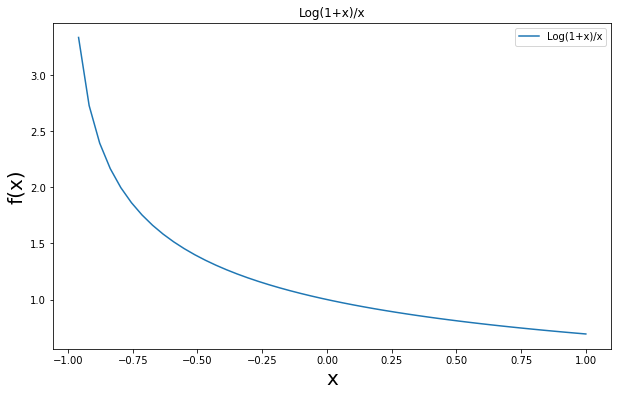

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
end = 1
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.title('Log(1+x)/x')
plt.plot(x, y, label='Log(1+x)/x')
plt.legend()

Notice how the error message that pops up above the graph gives a warning since we are dividing by zero woth a log function. Let's experiment by changes the value of the limits for multiple graphs

Let us change the limits from $-10^{-4}$ to $10^{-4}$

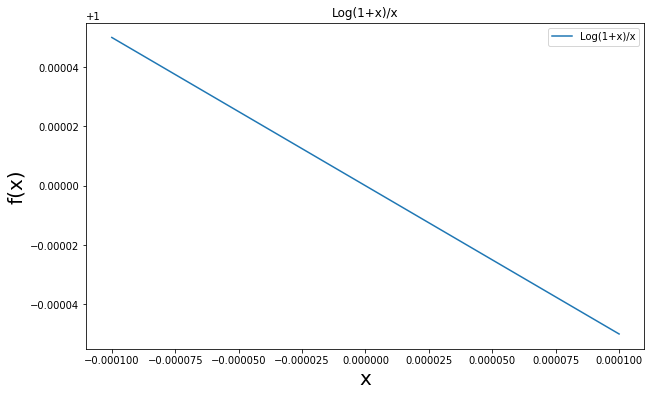

In [63]:
plt.figure(figsize=(10, 6))
end = 1e-4
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.title('Log(1+x)/x')
plt.plot(x, y, label='Log(1+x)/x')
plt.legend()

We don't really notice any strange things happening. Let's decrease the range even more to see what happens for smaller values of x

Now set limits from $-10^-{7}$ to $10^{-7}$

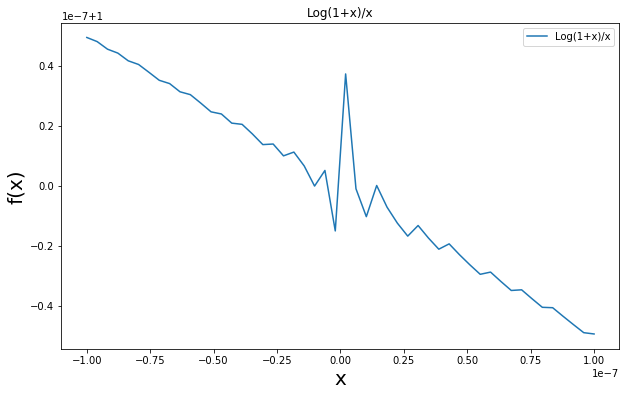

In [62]:
plt.figure(figsize=(10, 6))
end = 1e-7
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.title('Log(1+x)/x')
plt.plot(x, y, label='Log(1+x)/x')
plt.legend()

Now we see weird oscillations around $x = 0$. Let us see what happens if a smaller interval is chosen.

Limits from $10^{-15}$ to $10^{-15}$. This is close to machine precision we calculated previously.

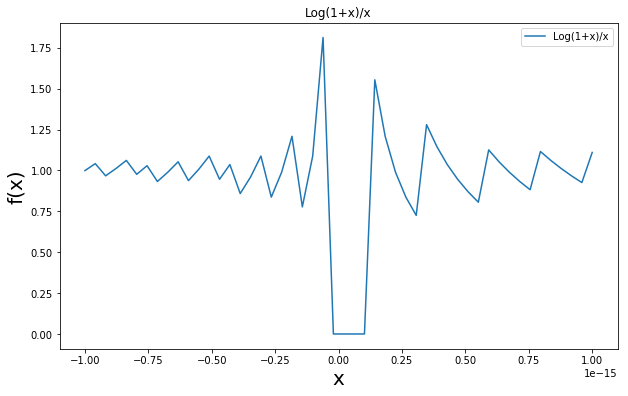

In [61]:
plt.figure(figsize=(10, 6))
end = 1e-15
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.title('Log(1+x)/x')
plt.plot(x, y, label='Log(1+x)/x')
plt.legend()

Here we can cleary see if we decrease x to magnitudes comparable to machine epsilon we face some strange results in the form of a flat center value. As $x\to0$, then $log(1+x)\to0$ and since the numerator approaches 0 then the whole fraction will be assumed to be close to 0. The reason behind this is because when we are storing very small numbers as $x\to0$ the machine will face errors storing these values as previously discussed, this is called underflow error. An underflow error occurs when the value of a number is smaller in magnitude (that is, closer to zero since $x\to0$) than the smallest representable value as a normal floating point number. Therefore the numbers that all underflow numbers get stored as subnormal numbers that are very close to 0, so the machine may think that the numbers are actually 0, and dividing by 0 is not possible hence an error will be visible in our graph. 

*source 6

## Reducing estimating error using Taylor expansion

The Taylor series, is valued greatly in the study of numerical methods. In general, the Taylor series provides a means to predict a function value at one point in terms of the function value and its derivatives at another
point. In particular, the theorem states that any smooth function can be approximated as a polynomial. The Taylor polynomial gives the worst case scenario for the difference between the estimated value of the function as provided by the Taylor polynomial and the actual value of the function. By replacing an exact mathematical procedure with a Taylor approximation, we hope to make it behave better while making calculations "identical".
The Taylor expansion of a function $f(x)$ is given as 

$$f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + ...  \frac{f^{(n)}(0)}{n!}x^n + \frac{f^{n+1}(\psi)}{(n+1)!}x^{n+1}$$

where $\psi$ is some number between $0$ and $x$. We are going to find the taylor approximation of $f(x) =\log(1+x)$ first, then divide the approximation by x to get our desired function $ g(x) = \frac{\log({1+x})}{x}.$ 

We begin by listing the derivatives of $f(x) = \log(1+x)$ below


$$f'(x) = \frac{1}{1+x}$$
$$f''(x) = -\frac{1}{(1+x)^2}$$
$$f'''(x) = \frac{2}{(1+x)^3}$$
$$f''''(x) = -\frac{6}{(1+x)^4}$$
$$f'''''(x) = \frac{24}{(1+x)^5}$$

At $x = 0$, the derivatives have the following values,

$$f(0) = \log(1)= 0$$
$$f'(0) = 1$$
$$f''(0) = -1$$
$$f'''(0) = 2$$
$$f''''(0) = -6$$
$$f'''''(0) = 24$$

The complete Taylor series is then written as 

$$f(x) = \log(1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} -\frac{x^4}{4} + R_5.$$

This gives us 

$$g(x) = \frac{\log(1+x)}{x} = 1 - \frac{x}{2} + \frac{x^2}{3}-\frac{x^3}{4} + Q_5,$$

Where $R_5$ and $Q_5$ are the error terms.

*source 6

Now let us try graph the Taylor series representation of the function to see if it makes any difference.

/Users/mousasunnoqrot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


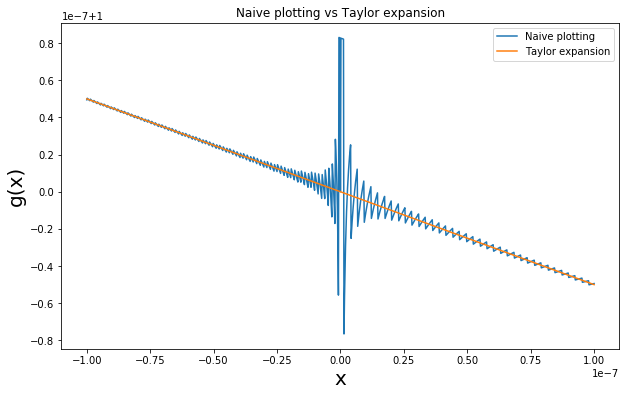

In [69]:
plt.figure(figsize=(10, 6))
end = 1e-7
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
z = 1 -x/2 + x*x/3 - x*x*x/4
plt.xlabel('x', fontsize=20)
plt.ylabel('g(x)', fontsize=20)
plt.title('Naive plotting vs Taylor expansion')
plt.plot(x, y, label='Naive plotting')
plt.plot(x, z, label = 'Taylor expansion')
plt.legend()

As we can clearly ass above, the Taylor expansion, although a less accurate representation is more precise than the more accurate direct function plotting. The reason behind this is because the taylor series includes terms which hug the mathematical expression. Therefore the more terms we add to the taylor series, the better it is going to hug our mathermatical expression. The first term is going to hug our expression from the center and the more terms we add the futher it is going to hug our expression and therefore represent a more precise graph. Once we reach a certian term, we would have hugged the expression at all the essential areas and therefore adding more terms past a certain point becomes obsolete. Taylor representaion would not be vaild if the derivatives at x=0 are all equal to 0 because no matter how many terms we add, our whole expression will be equal to 0. It is also not valid when the taylor series doesn't converge, since it will just keep blowing up and diverage into a numbers that can not be represented. Our taylor series is valid when it is within the error term that we mentioned in the previous part. We will now move on to calculating the error term.  

*source 7

Truncation errors are those that result from using an approximation in place of an exact mathematical procedure. We introduced the error terms $R_5$ and $Q_5$ where

$$R_5 = \frac{x^5}{5(1+\psi)^5}$$

$$Q_5=\frac{R_5}{x}$$

$$Q_5 = \frac{x^4}{5(1+\psi)^5}$$

Here, $0 < \psi < x$. To get the maximum value of error, we take the worst case value of $Q_5$ to be equal to the tolerance. Now, given an upper bound on the error $Q_5$, we can calculate what value of $x$ would give rise to this error. $\psi=0 $ when error is maximum. For machine error i.e. $Q_5 \approx 10^{-16}$, Therefore

$$Q_5 = \frac{x^4}{5}$$ 

We need to calculate the point to which truncation error is invisible 

$$|Q_5|\le 10^{-16}  $$


$$|\frac{x^4}{5}|\le  10^{-16}  $$

$$ x \approx 1.495 \times 10^{-4}$$

So $ x \le 1.495 \times 10^{-4}$, after this point the truncation error will no longer be invisible and will start to show

Essentially, we are saying here that the difference between the naive implementation and the Taylor series approximation is invisible to the machine. Below this point, the values being returned by the $\log$ function starts becoming error prone and produced strange effects on the graphs as we have seen previously. 

## Conclusion 

Knowledge from the world is gathered by conducting experiments and trying new things. It is important to understand how to express such data and how to analyze and draw meaningful conclusions from it. Humans rely heavily on computers for assistance in calculations in almost every scientific field. It is extremely important to identify and understand errors that computers make in order to avoid getting inaccurate answers that may skew our real life experiments. We specifically learned about errors involving floating points. In order to understand these errors we need to understand why computers use base 2 instead of base 10, we learned how to represent normalized numbers in IEEE754 format and we learned the types of rounding errors that the computer makes regarding floating points. Since the whole report was about the errors of floating point, it may have seemed that floating point do not have any advantages. That is entirely false. Floating points are very fast and efficient because they have been built over many years and now are able to do lighting fast calculations while dealing with massive and extremely tiny numbers. We learned the function of the sign, exponent, and mantissa bits in the IEEE format which brings us to how computer perform rounding in comparison to how humans perform rounding. We calculated machine epsilon, denoted by $\epsilon_M$, and understood that is as the distance between $1$ and the next smallest representable number. We discussed the importance of machine epsilon and how it comes into play when representing small numbers. We found largest floating point number that can be stored in the machine by finding the largest possible exponent that can stored in the machine which corresponds to the largest number that can be stored. We learned that overflow and underflow allow us to store infinitely many numbers without losing too much precision using tactical rounding methods. It was crucial to understand how to convert between decimal fractions and binary because in order to understand how the computer works and how it makes errors, we need to learn how to talk in it's language. 

In part 2 we quantified the errors in calculating values of functions which are error prone due to the limits of machine precision. It is important to quantify these errors, as we discussed, because when calculating real world problems using programs, the slightest error may prove to be detrimental. We plotted the function $ f(x) = \frac{\log({1+x})}{x}$ for different ranges of x and discovered that errors occur when $x\to0$ due to the strange way that machine precision works. We found the taylor series expansion for $ f(x) = \frac{\log({1+x})}{x}$ and by calculating all it's derivatives and ordering them in the appropriate manner. After that we used a taylor expansion to reduce the estimating error knowing that the more terms we add to the taylor series, the better it is going to hug our mathermatical expression. We added enough terms to the series in order for our expansion to hug our mathermatical expression to the point where it is very precise. We finally learned that truncation errors are those that result from using an approximation in place of an exact mathematical procedure and calculated the error terms. They are essential because after that error term the truncation error will no longer be invisible and will start to show causing strange effects in our calculations, which we represented graphically. Understanding machine error is very important to me as someone pursuing a career in actuaries. Actuaries work hand in hand with computers and different programs such as Python. Exploring a deep analysis of machine error, as did in this project, will allow me to recognize and respond to errors occurring in my future

Sources:  

1. http://math.ecnu.edu.cn/~jypan/Teaching/NA/refs/Numerical%20Analysis%202nd.Sauer.2012.pdf

2. https://fac.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf

3. https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html

4. https://stackoverflow.com/questions/2835278/what-is-a-bias-value-of-floating-point-numbers

5. https://www.soa.org/News-and-Publications/Newsletters/Compact/2014/may/Losing-My-Precision--Tips-For-Handling-Tricky-Floating-Point-Arithmetic.aspx

6. http://dewan.buet.ac.bd/EEE423/CourseMaterials/TaylorSeries.pdf

7. https://www.khanacademy.org/math/ap-calculus-bc/bc-series-new/bc-10-14/v/visualizing-taylor-series-approximations